In [1]:
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
egdi = pd.read_csv('UN_EGDI/UN_EGDI_EGDI_WIDEF.csv')
osi = pd.read_csv('UN_EGDI/UN_EGDI_OSI_WIDEF.csv') 
hci = pd.read_csv('UN_EGDI/UN_EGDI_HCI_WIDEF.csv') 
tii = pd.read_csv('UN_EGDI/UN_EGDI_TII_WIDEF.csv') 

In [3]:
egdi = egdi.iloc[:, chain([3], range(16, 28))]
osi = osi.iloc[:, chain([3], range(16, 28))]
hci = hci.iloc[:, chain([3], range(16, 28))]
tii = tii.iloc[:, chain([3], range(16, 28))]

In [4]:
egdi = egdi.loc[egdi['REF_AREA_LABEL'] == 'Brazil'].reset_index(drop=True)
osi = osi.loc[osi['REF_AREA_LABEL'] == 'Brazil'].reset_index(drop=True)
hci = hci.loc[hci['REF_AREA_LABEL'] == 'Brazil'].reset_index(drop=True)
tii = tii.loc[tii['REF_AREA_LABEL'] == 'Brazil'].reset_index(drop=True)

In [5]:
egdi = egdi.melt(
    id_vars='REF_AREA_LABEL',
    value_vars=egdi[1:], 
    var_name='Anos', 
    value_name='EGDI'
)

osi = osi.melt(
    id_vars='REF_AREA_LABEL',
    value_vars=osi[1:], 
    var_name='Anos', 
    value_name='OSI'
)

hci = hci.melt(
    id_vars='REF_AREA_LABEL',
    value_vars=hci[1:], 
    var_name='Anos', 
    value_name='HCI'
)

tii = tii.melt(
    id_vars='REF_AREA_LABEL',
    value_vars=tii[1:], 
    var_name='Anos', 
    value_name='TII'
)

In [6]:
egdi['Anos'] = egdi['Anos'].astype(np.int64)
osi['Anos'] = osi['Anos'].astype(np.int64)
hci['Anos'] = hci['Anos'].astype(np.int64)
tii['Anos'] = tii['Anos'].astype(np.int64)

In [7]:
egdi['EGDI'] = egdi['EGDI'].astype(np.float64)
osi['OSI'] = osi['OSI'].astype(np.float64)
hci['HCI'] = hci['HCI'].astype(np.float64)
tii['TII'] = tii['TII'].astype(np.float64)

In [8]:
df = egdi.merge(osi, on=['Anos', 'REF_AREA_LABEL']).merge(hci, on=['Anos', 'REF_AREA_LABEL']).merge(tii, on=['Anos', 'REF_AREA_LABEL'])

In [9]:
df = df.iloc[:, range(1, 6)]

In [10]:
df = df.melt(
    id_vars='Anos',
    value_vars=df[1:], 
    var_name='Componentes', 
    value_name='Valores'
)

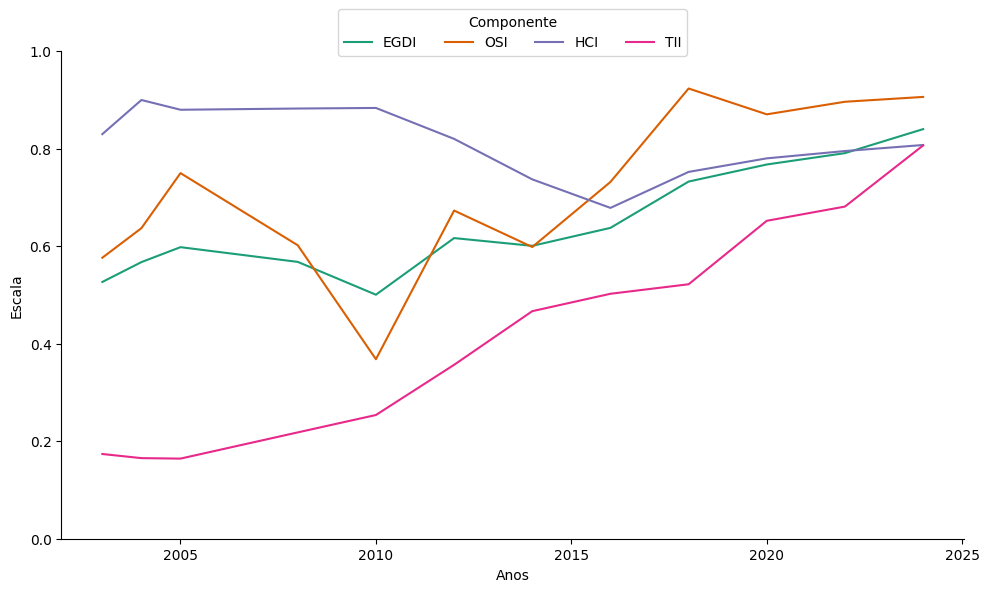

In [11]:
plt.figure(figsize=(10, 6))

sns.lineplot(df, x='Anos', y='Valores', hue='Componentes', palette='Dark2')

sns.despine()
plt.ylim(0, 1)
plt.ylabel('Escala')
plt.legend(title='Componente', loc='upper center', bbox_to_anchor=(0.5, 1.1), ncols=4)
plt.tight_layout()
plt.savefig('C:/Users/lazar/Dissertacao-Mestrado-PoderJud-EGDI/figuras/egdi_brasil_2003_2024.png', dpi=300, bbox_inches='tight')
plt.show()